In [375]:
#### import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')

from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

from statsmodels.api import Logit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score

In [376]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [377]:
df = pd.read_csv('final_absolute_data.csv')
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
df.head()

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Process 2-1,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Etching_Chamber,Process 3,Thin F4,Thin F2,Temp_Etching,Source_Power,Selectivity,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,Path,Defect,Thin F3,Thin F1,etching_rate_total,etching_rate_10_20,etching_rate_20_30,etching_rate_30_40
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120.0,713.132,13,28,01-03-2019,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.020,91.918,30.005,1,photo_li,41.676,I,365,505.388,109.628,1,Etching,340.0,3644.0,72.651,52.103,1.030,1,Implantation,1.500198e+16,1.316363e+17,6.468338e+17,3.011187e+17,6.000012e+17,30795.934,103.433,854.0,154,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111,0,1522.0,5732.0,179.733333,208.8,212.2,118.2
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137.0,714.295,13,29,01-03-2019,1,Photo,0.86579,16.090,15.059,19.993,199.835,89.999,507.183,4072.913,4979.082,4.937,90.976,30.005,1,photo_li,53.612,H,405,541.732,104.917,2,Etching,265.0,3631.0,70.267,52.004,1.038,2,Implantation,1.105654e+16,4.367509e+16,1.041399e+18,3.026639e+17,6.000008e+17,32135.618,105.552,895.0,156,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21122,0,1513.0,5729.0,182.133333,209.8,211.8,124.8
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116.0,710.114,13,30,01-03-2019,1,Photo,0.90483,19.026,14.930,19.995,202.118,90.001,501.286,4084.939,5031.989,4.888,91.969,30.006,1,photo_li,47.598,I,365,532.200,106.632,3,Etching,411.0,3653.0,71.231,50.846,1.005,3,Implantation,1.044283e+16,1.507393e+16,6.473188e+17,2.983347e+17,5.999989e+17,31057.895,102.598,898.0,152,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21133,0,1568.0,5729.0,177.266667,207.6,208.5,115.7
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143.0,710.617,13,31,01-03-2019,1,Photo,0.42197,18.891,14.947,20.004,194.668,90.000,503.396,4045.078,4969.316,4.933,91.458,30.001,1,photo_li,32.843,G,436,537.729,108.785,1,Etching,328.0,3661.0,71.295,51.665,1.025,1,Implantation,8.885135e+15,1.022922e+17,3.408444e+17,2.999225e+17,5.999997e+17,32140.566,102.963,879.0,155,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,21111,0,1326.0,5718.0,179.666667,205.7,233.5,99.8
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76.0,711.632,13,32,01-03-2019,1,Photo,1.70139,13.788,14.820,19.998,202.192,90.000,501.423,4010.176,5092.407,5.050,94.723,29.988,1,photo_li,57.370,H,405,522.143,109.913,2,Etching,219.0,3637.0,72.983,50.787,1.038,2,Implantation,1.665762e+16,7.883038e+16,7.255226e+17,3.018136e+17,6.000004e+17,31986.009,101.419,882.0,155,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,21122,0,1451.0,5729.0,183.666667,209.2,218.6,123.2


In [378]:
df_x = df[['Temp_OXid', 'ppm', 'Pressure', 'thickness', 'resist_target', 'temp_HMDS_bake',
          'spin1', 'spin3', 'photoresist_bake', 'temp_softbake', 'Line_CD', 'Thin F4', 'Temp_Etching',
          'Source_Power', 'Selectivity', 'etching_rate_total', 'Temp_implantation', 'RTA_Temp']]
df_x.head()

,Temp_OXid,ppm,Pressure,thickness,resist_target,temp_HMDS_bake,spin1,spin3,photoresist_bake,temp_softbake,Line_CD,Thin F4,Temp_Etching,Source_Power,Selectivity,etching_rate_total,Temp_implantation,RTA_Temp
0,1214.307948,26.69,0.203,713.132,1.46994,200.551,502.391,4903.611,5.020,91.918,41.676,340.0,72.651,52.103,1.030,179.733333,103.433,154
1,978.110792,30.86,0.217,714.295,0.86579,199.835,507.183,4979.082,4.937,90.976,53.612,265.0,70.267,52.004,1.038,182.133333,105.552,156
2,1176.019149,31.07,0.218,710.114,0.90483,202.118,501.286,5031.989,4.888,91.969,47.598,411.0,71.231,50.846,1.005,177.266667,102.598,152
3,933.442733,31.04,0.196,710.617,0.42197,194.668,503.396,4969.316,4.933,91.458,32.843,328.0,71.295,51.665,1.025,179.666667,102.963,155
4,1140.598752,31.37,0.215,711.632,1.70139,202.192,501.423,5092.407,5.050,94.723,57.370,219.0,72.983,50.787,1.038,183.666667,101.419,155


In [379]:
df_y = df['Defect']
df_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Defect, dtype: int64

In [380]:
df['Defect'].value_counts()

0    1587
1     115
Name: Defect, dtype: int64

In [381]:
115 / 1702

0.06756756756756757

In [382]:
df['Target'].sum() /(1702*2000)

0.051206227967097534

# Standard Scaler

In [383]:
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df_x)
df_X = pd.DataFrame(np_scaled, columns = df_x.columns)
df_X.head()

,Temp_OXid,ppm,Pressure,thickness,resist_target,temp_HMDS_bake,spin1,spin3,photoresist_bake,temp_softbake,Line_CD,Thin F4,Temp_Etching,Source_Power,Selectivity,etching_rate_total,Temp_implantation,RTA_Temp
0,0.969265,-0.833902,-0.837034,0.266287,0.667847,0.004720,0.527025,-1.682864,0.016588,-0.037518,0.073187,0.357760,1.879155,1.348926,-0.158904,-0.214044,0.165204,-0.286628
1,-0.609024,-0.317258,0.678417,0.411926,-0.784792,-0.244903,2.125910,-0.584023,-1.165734,-0.685800,1.085269,-0.247604,-1.109112,1.194339,0.329722,0.370085,1.446173,0.540220
2,0.713416,-0.291240,0.786663,-0.111648,-0.690923,0.551031,0.158334,0.186290,-1.863732,-0.002420,0.575328,0.930839,0.099231,-0.613860,-1.685862,-0.814399,-0.339567,-1.113476
3,-0.907500,-0.294957,-1.594759,-0.048659,-1.851928,-2.046300,0.862350,-0.726214,-1.222714,-0.354089,-0.675785,0.260902,0.179453,0.664996,-0.464296,-0.230270,-0.118918,0.126796
4,0.476734,-0.254071,0.461924,0.078446,1.224354,0.576830,0.204045,1.065962,0.443934,1.892873,1.403919,-0.618895,2.295306,-0.705987,0.329722,0.743279,-1.052291,0.126796


# Train-Test Split

In [384]:
train_x, test_x, train_y, test_y = train_test_split(df_X, df_y, test_size = 0.3,
                                                    random_state = 1234, stratify= df_y)

# Logistic Regression

In [385]:

clf = LogisticRegression(random_state = 1234).fit(train_x, train_y)
print('Accuracy on training set : {:.3f}'.format(clf.score(train_x,train_y)))
y_pred = clf.predict(train_x)
print('F1 Score on Training :', classification_report(y_pred, train_y))
print('\n------------------------------------------------------------\n')
print('Accuracy on test set : {:.3f}'.format(clf.score(test_x,test_y)))
y_pred = clf.predict(test_x)
print('F1 Score on Test :', classification_report(y_pred, test_y))

Accuracy on training set : 0.948
F1 Score on Training :               precision    recall  f1-score   support

           0       1.00      0.95      0.97      1165
           1       0.28      0.85      0.42        26

    accuracy                           0.95      1191
   macro avg       0.64      0.90      0.69      1191
weighted avg       0.98      0.95      0.96      1191


------------------------------------------------------------

Accuracy on test set : 0.945
F1 Score on Test :               precision    recall  f1-score   support

           0       1.00      0.95      0.97       502
           1       0.23      0.89      0.36         9

    accuracy                           0.95       511
   macro avg       0.61      0.92      0.67       511
weighted avg       0.98      0.95      0.96       511



In [386]:
train, test, f1 = [], [], []
train.append(clf.score(train_x,train_y))
test.append(clf.score(test_x,test_y))

In [387]:
roc_auc_score(train_y, clf.predict_proba(train_x)[:, 1])

0.8688343834383438

In [388]:
for i in range(1,10):
    y_pred = clf.predict_proba(test_x)
    y_pred = np.where(y_pred[:, 1] > 0.1 * i, 1, 0)
    #print(y_pred)
    print('==================== Threshold :{:.1f} ===================='.format(i*0.1))
    print(classification_report(test_y, y_pred))
    print('\n')
    
f1.append(0.73)
 

==================== Threshold :0.1 ====================
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       476
           1       0.30      0.71      0.42        35

    accuracy                           0.86       511
   macro avg       0.64      0.80      0.67       511
weighted avg       0.93      0.86      0.89       511



==================== Threshold :0.2 ====================
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       476
           1       0.47      0.51      0.49        35

    accuracy                           0.93       511
   macro avg       0.72      0.74      0.73       511
weighted avg       0.93      0.93      0.93       511



==================== Threshold :0.3 ====================
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       476
           1       0.50      0.29      0.36        35

    acc

In [389]:
v_feature_name = train_x.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = clf.coef_[0]

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,Pressure,0.719
11,Thin F4,0.556
4,resist_target,0.338
3,thickness,0.336
16,Temp_implantation,0.218
12,Temp_Etching,0.185
10,Line_CD,0.177
5,temp_HMDS_bake,0.163
14,Selectivity,0.134
6,spin1,0.132


Text(0, 0.5, '설명변수')

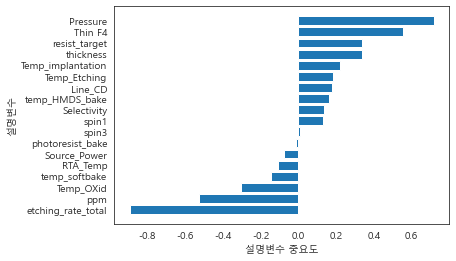

In [390]:
df_importance.sort_values('Importance', ascending = True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

<AxesSubplot:>

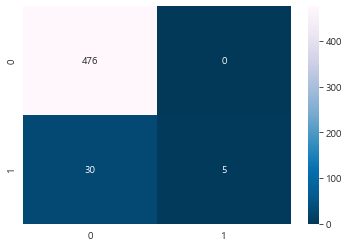

In [391]:
sns.heatmap(data = confusion_matrix(test_y,y_pred), annot = True, fmt=".0f", cmap = 'PuBu_r')

# Decision Tree

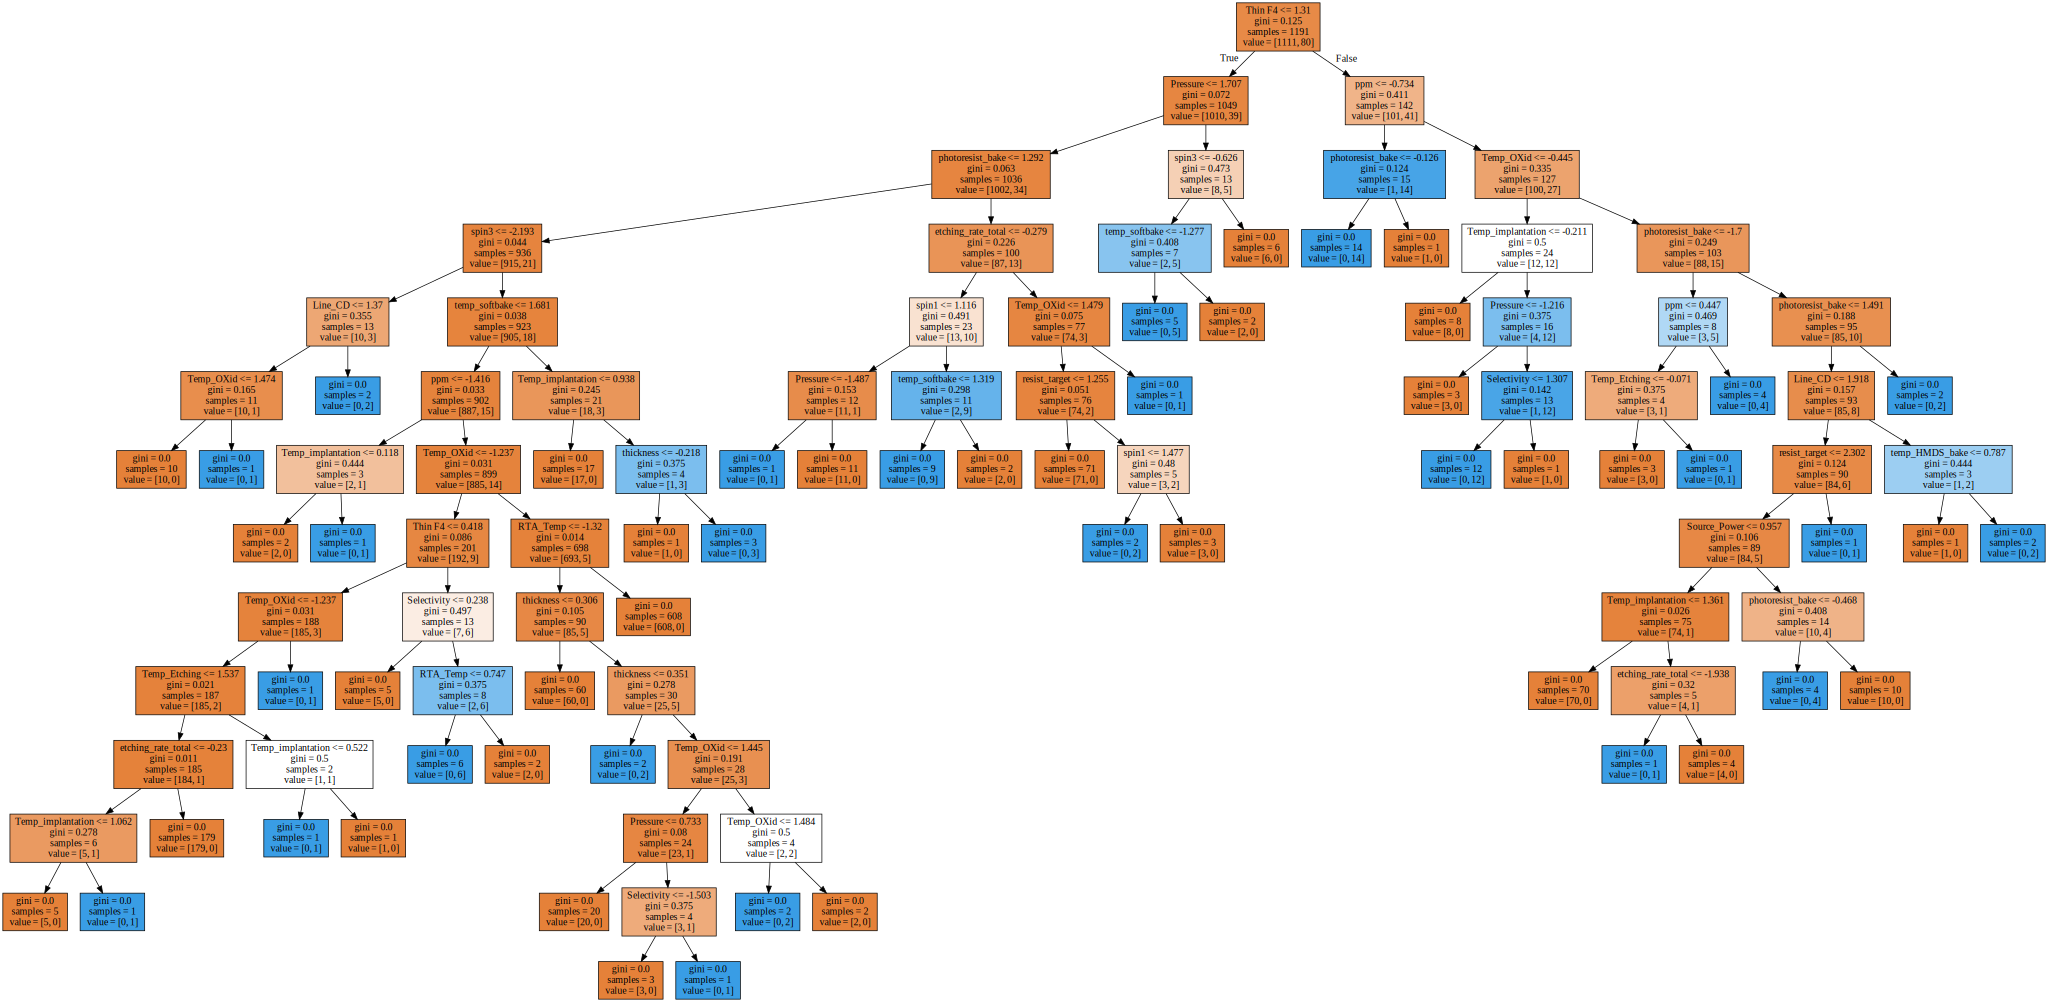

In [392]:
tr_clf = DecisionTreeClassifier(random_state = 1234).fit(train_x, train_y)
export_graphviz(tr_clf, out_file = 'tree_low.dot',
               feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [393]:
print('Accuracy on training set : {:.3f}'.format(tr_clf.score(train_x,train_y)))
y_pred = tr_clf.predict(train_x)
print('F1 Score on Training :', classification_report(train_y, y_pred))
print('\n------------------------------------------------------------\n')
print('Accuracy on test set : {:.3f}'.format(tr_clf.score(test_x,test_y)))
y_pred = tr_clf.predict(test_x)
print('F1 Score on Test :', classification_report(test_y, y_pred))
train.append(tr_clf.score(train_x,train_y))
test.append(tr_clf.score(test_x,test_y))

Accuracy on training set : 1.000
F1 Score on Training :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00        80

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191


------------------------------------------------------------

Accuracy on test set : 0.943
F1 Score on Test :               precision    recall  f1-score   support

           0       0.97      0.96      0.97       476
           1       0.57      0.66      0.61        35

    accuracy                           0.94       511
   macro avg       0.77      0.81      0.79       511
weighted avg       0.95      0.94      0.94       511



In [394]:
roc_auc_score(train_y, clf.predict_proba(train_x)[:, 1])

0.8688343834383438

In [395]:
for i in range(1,10):
    y_pred = tr_clf.predict_proba(test_x)
    y_pred = np.where(y_pred[:, 1] > 0.1 * i, 1, 0)
    #print(y_pred)
    print('==================== Threshold :{:.1f} ===================='.format(i*0.1))
    print(classification_report(test_y, y_pred))
    print('\n')
    
f1.append(0.79)

==================== Threshold :0.1 ====================
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       476
           1       0.57      0.66      0.61        35

    accuracy                           0.94       511
   macro avg       0.77      0.81      0.79       511
weighted avg       0.95      0.94      0.94       511



==================== Threshold :0.2 ====================
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       476
           1       0.57      0.66      0.61        35

    accuracy                           0.94       511
   macro avg       0.77      0.81      0.79       511
weighted avg       0.95      0.94      0.94       511



==================== Threshold :0.3 ====================
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       476
           1       0.57      0.66      0.61        35

    acc

In [396]:
## df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tr_clf.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
10,Thin F4,0.138
6,photoresist_bake,0.113
1,ppm,0.113
15,Temp_OXid,0.097
11,Temp_implantation,0.094
0,Pressure,0.064
8,spin1,0.058
4,etching_rate_total,0.050
3,Selectivity,0.046
14,temp_softbake,0.045


Text(0, 0.5, '설명변수')

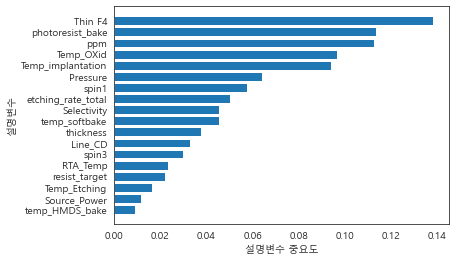

In [397]:
df_importance.sort_values('Importance', ascending = True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

<AxesSubplot:>

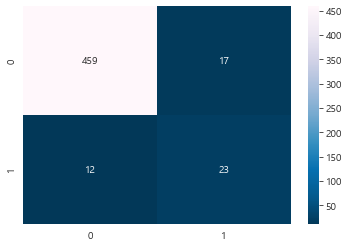

In [398]:
sns.heatmap(data = confusion_matrix(test_y,y_pred), annot = True,fmt=".0f", cmap = 'PuBu_r')

## DecisionTree GridSearchCV

In [399]:
from sklearn.model_selection import GridSearchCV
para_depth = [depth for depth in range(1,11)]
para_split = [n_split * 10 for n_split in range(1,11)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

estimator = DecisionTreeClassifier()
param_grid = {'max_depth' : para_depth, 'min_samples_split' : para_split,
             'min_samples_leaf': para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(train_x, train_y)

print('best estimator model : \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter : \n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

best estimator model : 
DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=10)

best parameter : 
{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}

best score:
0.94


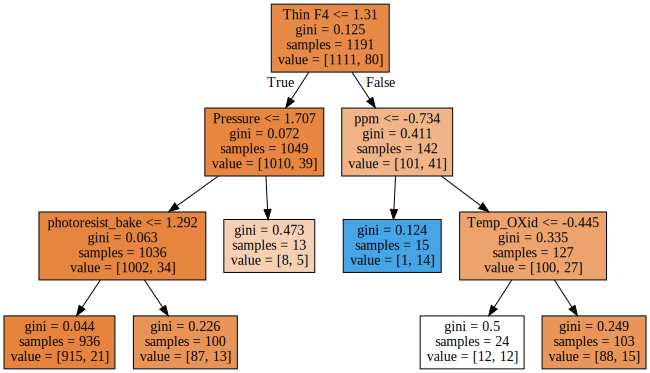

In [400]:
tree_final = DecisionTreeClassifier(random_state = 1234,max_depth = 3,min_samples_split = 10,
                                   min_samples_leaf = 10).fit(train_x, train_y)
export_graphviz(tree_final, out_file = 'tree_low.dot',
               feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [401]:
y_pred = tree_final.predict_proba(test_x)
y_pred = np.where(y_pred[:, 1] > 0.3, 1, 0)
print(y_pred)
print(classification_report(test_y, y_pred))

[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

<AxesSubplot:>

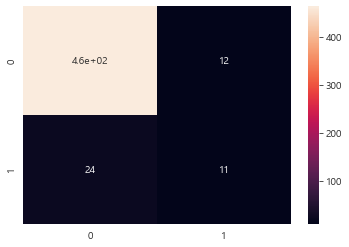

In [402]:
sns.heatmap(data = confusion_matrix(test_y,y_pred), annot = True)

# Random Forest

In [403]:
v_feature_name = test_x.columns
rf_clf = RandomForestClassifier(random_state = 1234).fit(train_x, train_y)
print('Accuracy on training set : {:.3f}'.format(rf_clf.score(train_x,train_y)))
y_pred = rf_clf.predict(train_x)
print('F1 Score on Training :', classification_report(train_y,y_pred))

print('Accuracy on test set : {:.3f}'.format(rf_clf.score(test_x,test_y)))
y_pred = rf_clf.predict(test_x)
print('F1 Score on Test :', classification_report(test_y,y_pred))

train.append(rf_clf.score(train_x,train_y))
test.append(rf_clf.score(test_x,test_y))

Accuracy on training set : 1.000
F1 Score on Training :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00        80

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191

Accuracy on test set : 0.967
F1 Score on Test :               precision    recall  f1-score   support

           0       0.97      1.00      0.98       476
           1       1.00      0.51      0.68        35

    accuracy                           0.97       511
   macro avg       0.98      0.76      0.83       511
weighted avg       0.97      0.97      0.96       511



In [404]:
roc_auc_score(train_y, rf_clf.predict_proba(train_x)[:, 1])

1.0

In [405]:
for i in range(1,10):
    y_pred = clf.predict_proba(test_x)
    y_pred = np.where(y_pred[:, 1] > 0.1 * i, 1, 0)
    #print(y_pred)
    print('==================== Threshold :{:.1f} ===================='.format(i*0.1))
    print(classification_report(test_y, y_pred))
    print('\n')
    
f1.append(0.88)

==================== Threshold :0.1 ====================
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       476
           1       0.30      0.71      0.42        35

    accuracy                           0.86       511
   macro avg       0.64      0.80      0.67       511
weighted avg       0.93      0.86      0.89       511



==================== Threshold :0.2 ====================
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       476
           1       0.47      0.51      0.49        35

    accuracy                           0.93       511
   macro avg       0.72      0.74      0.73       511
weighted avg       0.93      0.93      0.93       511



==================== Threshold :0.3 ====================
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       476
           1       0.50      0.29      0.36        35

    acc

In [406]:
v_feature_name = train_x.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_clf.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
11,Thin F4,0.120
15,etching_rate_total,0.114
0,Temp_OXid,0.084
1,ppm,0.075
3,thickness,0.059
7,spin3,0.059
16,Temp_implantation,0.053
2,Pressure,0.053
9,temp_softbake,0.049
6,spin1,0.043


Text(0, 0.5, '설명변수')

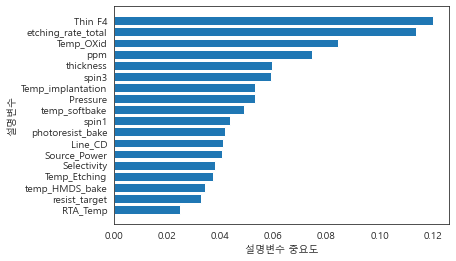

In [407]:
df_importance.sort_values('Importance', ascending = True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

### 랜덤포레스트 그리드서치

In [408]:
para_depth = [depth for depth in range(1,11)]
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

estimator = RandomForestClassifier()
param_grid = {'max_depth' : para_depth,
             'min_samples_leaf': para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_rf.fit(train_x, train_y)

print('best estimator model : \n{}'.format(grid_rf.best_estimator_))
print('\nbest parameter : \n{}'.format(grid_rf.best_params_))
print('\nbest score:\n{}'.format(grid_rf.best_score_.round(3)))

best estimator model : 
RandomForestClassifier(max_depth=10, min_samples_leaf=2)

best parameter : 
{'max_depth': 10, 'min_samples_leaf': 2}

best score:
0.954


In [409]:
rf_final = RandomForestClassifier(random_state = 1234,max_depth = 10,
                                   min_samples_leaf = 2).fit(train_x, train_y)

y_pred = rf_final.predict_proba(test_x)
y_pred = np.where(y_pred[:, 1] > 0.3, 1, 0)
print(y_pred)
print(classification_report(test_y, y_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 

<AxesSubplot:>

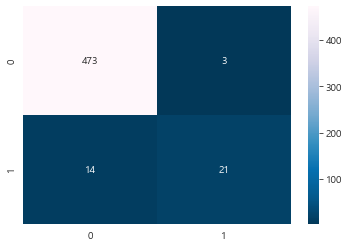

In [410]:
sns.heatmap(data = confusion_matrix(test_y,y_pred), annot = True, fmt=".0f", cmap = 'PuBu_r')

# Gradient Boosting

In [411]:
gb_clf=GradientBoostingClassifier(random_state=1234).fit(train_x, train_y)
print('Accuracy on training set : {:.3f}'.format(gb_clf.score(train_x,train_y)))
y_pred = gb_clf.predict(train_x)
print('F1 Score on Training :', classification_report(train_y,y_pred))

print('Accuracy on test set : {:.3f}'.format(gb_clf.score(test_x,test_y)))
y_pred = gb_clf.predict(test_x)
print('F1 Score on Test :', classification_report(test_y,y_pred))

train.append(gb_clf.score(train_x,train_y))
test.append(gb_clf.score(test_x,test_y))


Accuracy on training set : 0.997
F1 Score on Training :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      0.95      0.97        80

    accuracy                           1.00      1191
   macro avg       1.00      0.97      0.99      1191
weighted avg       1.00      1.00      1.00      1191

Accuracy on test set : 0.963
F1 Score on Test :               precision    recall  f1-score   support

           0       0.97      0.99      0.98       476
           1       0.86      0.54      0.67        35

    accuracy                           0.96       511
   macro avg       0.92      0.77      0.82       511
weighted avg       0.96      0.96      0.96       511



In [412]:
roc_auc_score(train_y, gb_clf.predict_proba(train_x)[:, 1])

0.9999887488748875

In [413]:
for i in range(1,10):
    y_pred = gb_clf.predict_proba(test_x)
    y_pred = np.where(y_pred[:, 1] > 0.1 * i, 1, 0)
    #print(y_pred)
    print('==================== Threshold :{:.1f} ===================='.format(i*0.1))
    print(classification_report(test_y, y_pred))
    print('\n')
    
f1.append(0.84)

==================== Threshold :0.1 ====================
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       476
           1       0.52      0.74      0.61        35

    accuracy                           0.94       511
   macro avg       0.75      0.85      0.79       511
weighted avg       0.95      0.94      0.94       511



==================== Threshold :0.2 ====================
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       476
           1       0.66      0.66      0.66        35

    accuracy                           0.95       511
   macro avg       0.82      0.82      0.82       511
weighted avg       0.95      0.95      0.95       511



==================== Threshold :0.3 ====================
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       476
           1       0.79      0.63      0.70        35

    acc

In [414]:
v_feature_name = train_x.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_clf.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
11,Thin F4,0.283
0,Temp_OXid,0.132
9,temp_softbake,0.080
1,ppm,0.072
2,Pressure,0.065
3,thickness,0.058
16,Temp_implantation,0.053
8,photoresist_bake,0.052
10,Line_CD,0.027
7,spin3,0.026


Text(0, 0.5, '설명변수')

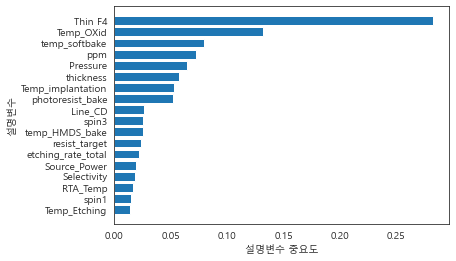

In [415]:
df_importance.sort_values('Importance', ascending = True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

<AxesSubplot:>

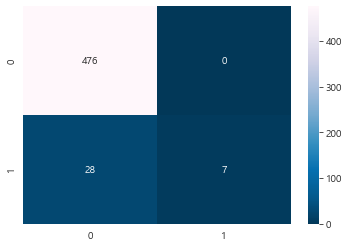

In [416]:
sns.heatmap(data = confusion_matrix(test_y,y_pred), annot = True,fmt=".0f", cmap = 'PuBu_r')

# XGBoost

In [417]:
xgb_clf = XGBClassifier(random_state = 1234).fit(train_x, train_y)
print('Accuracy on training set : {:.3f}'.format(xgb_clf.score(train_x,train_y)))
y_pred = xgb_clf.predict(train_x)
print('F1 Score on Training :', classification_report(train_y,y_pred))

print('Accuracy on test set : {:.3f}'.format(xgb_clf.score(test_x,test_y)))
y_pred = xgb_clf.predict(test_x)
print('F1 Score on Test :', classification_report(test_y,y_pred))

train.append(xgb_clf.score(train_x,train_y))
test.append(xgb_clf.score(test_x,test_y))



[00:23:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on training set : 1.000
F1 Score on Training :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00        80

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191

Accuracy on test set : 0.965
F1 Score on Test :               precision    recall  f1-score   support

           0       0.97      0.99      0.98       476
           1       0.87      0.57      0.69        35

    accuracy                           0.96       511
   macro avg       0.92      0.78      0.

In [418]:
roc_auc_score(train_y, xgb_clf.predict_proba(train_x)[:, 1])

1.0

In [419]:
for i in range(1,10):
    y_pred = xgb_clf.predict_proba(test_x)
    y_pred = np.where(y_pred[:, 1] > 0.1 * i, 1, 0)
    #print(y_pred)
    print('==================== Threshold :{:.1f} ===================='.format(i*0.1))
    print(classification_report(test_y, y_pred))
    print('\n')
    
f1.append(0.87)

==================== Threshold :0.1 ====================
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       476
           1       0.71      0.77      0.74        35

    accuracy                           0.96       511
   macro avg       0.85      0.87      0.86       511
weighted avg       0.96      0.96      0.96       511



==================== Threshold :0.2 ====================
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       476
           1       0.83      0.69      0.75        35

    accuracy                           0.97       511
   macro avg       0.90      0.84      0.87       511
weighted avg       0.97      0.97      0.97       511



==================== Threshold :0.3 ====================
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       476
           1       0.81      0.63      0.71        35

    acc

In [420]:
v_feature_name = train_x.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = clf.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [ ]:
df_importance.sort_values('Importance', ascending = True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [ ]:
sns.heatmap(data = confusion_matrix(test_y,y_pred), annot = True)

In [440]:
models = ['Logistic', 'Decision', 'Random', 'GB', 'XGB']

plot_df = pd.DataFrame(train, index = models,columns = ['train'])
plot_df['test'] = test
plot_df['F1'] = f1
#test_df = pd.DataFrame(test,index = models,columns = ['test'])
#f1_df = pd.DataFrame(f1, index = models, columns = ['F1_Score'])

plot_df

,train,test,F1
Logistic,0.947943,0.945205,0.73
Decision,1.000000,0.943249,0.79
Random,1.000000,0.966732,0.88
GB,0.996641,0.962818,0.84
XGB,1.000000,0.964775,0.87


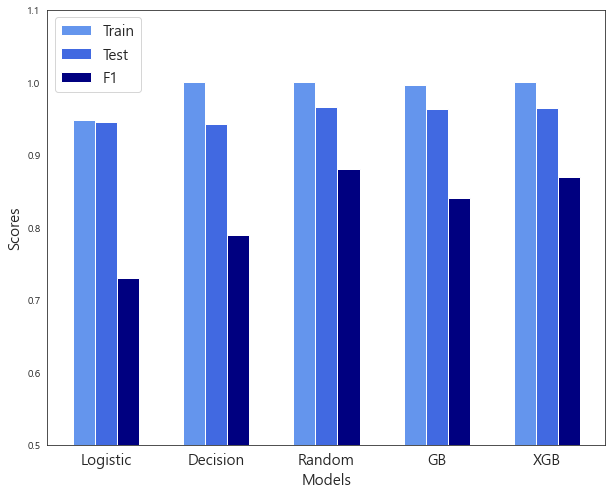

In [475]:
# create data
x = np.arange(5)
y1 = train
y2 = test
y3 = f1
width = 0.2
  
# plot data in grouped manner of bar type
plt.figure(figsize = (10, 8))
plt.bar(x-0.2, y1, width, color='cornflowerblue')
plt.bar(x, y2, width, color='royalblue')
plt.bar(x+0.2, y3, width, color='navy')
plt.xticks(x, ['Logistic', 'Decision', 'Random', 'GB', 'XGB'],fontsize = 15)
plt.xlabel("Models",fontsize = 15)
plt.ylabel("Scores",fontsize = 15)
plt.ylim((0.5, 1.1))

plt.legend(["Train", "Test", "F1"], fontsize = 15)
plt.show()

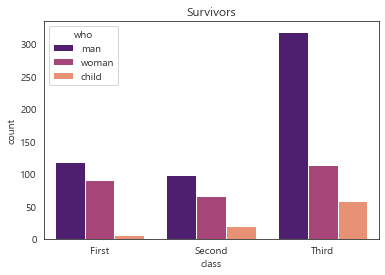

In [446]:
titanic = sns.load_dataset('titanic')

sns.countplot(x = 'class', hue = 'who', data = titanic, palette = 'magma')
plt.title('Survivors')
plt.show()

In [448]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [457]:
models

['Logistic', 'Decision', 'Random', 'GB', 'XGB']

In [459]:
np.array(numerical).shape

(3, 5)

IndexError: list index out of range

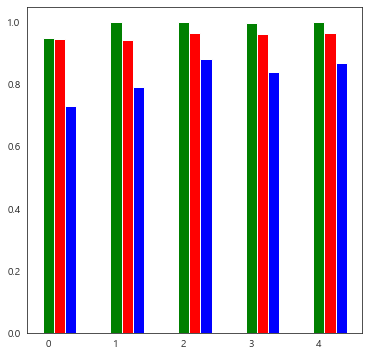

In [445]:
import matplotlib.pyplot as plt
categorical_1 = models
colors        = ['green', 'red', 'blue']
numerical = [train, test, f1]
aaa = ["train", "test", "F1"]
number_groups = len(categorical_1) 
bin_width = 1.0/(number_groups+1)
fig, ax = plt.subplots(figsize=(6,6))
for i in range(number_groups):
    ax.bar(x=np.arange(len(categorical_1)) + i*bin_width, 
           height=numerical[i],
           width=bin_width,
           color=colors[i],
           align='center', label = aaa[i])
ax.set_xticks(np.arange(len(categorical_1)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(categorical_1)
ax.legend(categorical_1, facecolor='w')
plt.show()

<AxesSubplot:ylabel='count'>

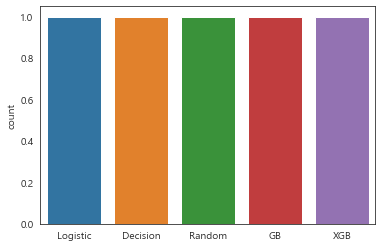

In [441]:
sns.countplot(data = plot_df, x = plot_df.index, )

[(0.9, 1.05)]

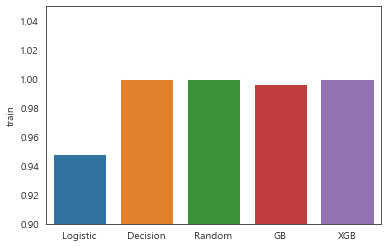

In [438]:
ax1 = sns.barplot(y =train_df.train, x=train_df.index)
ax1.set(ylim = (0.9,1.05))

[(0.85, 1.0)]

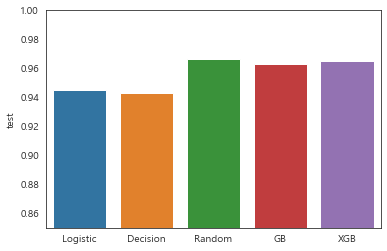

In [433]:
ax2 = sns.barplot(y =test_df.test, x=test_df.index)
ax2.set(ylim = (0.85,1))

[(0.55, 1.0)]

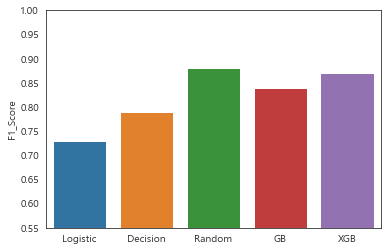

In [436]:
ax3 = sns.barplot(y =f1_df.F1_Score, x=f1_df.index)
ax3.set(ylim = (0.55,1))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

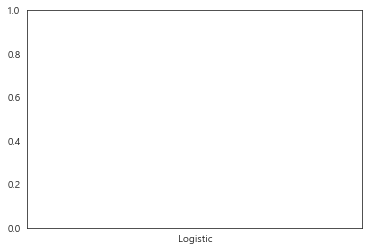

In [329]:
plt.bar(models, f1)